##  基于决策树和随机森林的鸢尾花分类

打开notebook 开发环境，新建ipynb文件，命名为`实验5.ipynb`保存在当前项目根目录下文件夹中。



In [4]:
# 步骤一、加载、查看鸢尾花数据集
# sklearn库中有现成的鸢尾花数据集可以直接调用

import numpy as np
import pandas as pd
import matplotlib as plt
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz


iris = load_iris()      # 准备数据集
features = iris.data    # 获取特征集
labels = iris.target    # 获取目标集
# 将鸢尾花特征与数据添加在一起
iris_dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataset['label'] = iris.target
print(iris_dataset.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


In [6]:
# 拆步骤二、数据处理及拆分

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=0)

print(X_train.shape, X_test.shape) # 查看拆分结果

(100, 4) (50, 4)


### 1 使用DecisionTreeClassifier函数和RandomForestRegressor函数这两种函数默认参数补全代码。 

### 2 对不同函数的参数进行调参，指定使用哪种决策树算法。使用criterion="entropy"(信息熵)、criterion=”gini”(CART算法)，同时修改参数splitter的值选择‘best’或者‘random’、修改max_depth的值分选择2和5进行实验。打印8种实验结果，以及使用20棵和50棵决策树的随机森林进行实验

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


'''
sklearn中与决策树有关的函数有DecisionTreeRegressor和DecisionTreeClassifier，前者是决策树回归函数后者是决策树分类函数，参数略有不同，
DecisionTreeRegressor中特征选择标准criterion可以选择squared_error代表均方差，absolute_error代表和均值之差的绝对值之和。一般来说默认参数
squared_error更精确。DecisionTreeClassifier中的criterion可以选择gini代表基尼系数即CART算法，值越小代表分类的纯度越高；entropy代表
信息增益。为了提高精度，可以使用几十棵决策树集成为随机森林RandomForestRegressor

1、DecisionTreeRegressor；2、DecisionTreeClassifier；3、RandomForestRegressor

分别使用不同的决策树类别进行实验。

'''

# 创建回归模型model_1 = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
# 决策树（使用决策树分类算法，参数选择gini和entropy，使用决策树回归算法，参数选择squared_error和absolute_error）
# 使用50棵（100棵）决策树构成随机森林

'''
//==========================================================================================//
//=====================================请在此编写实验代码===================================//
//==========================================================================================//
'''

# 按照下列格式打印
# 打印格式：

print('---------------\t决策树\t---------------')
# 评估模型（分类模型输出准确率，回归模型输出R2_score）
print('test_score:', model_1.score(X_test, y_test))
# 预测测试集中的鸢尾花种类
y_pred1 = model_1.predict(X_test)
n = 10 # 显示前n个样本的预测年龄，并与实际年龄作对比
print('预测种类：', np.round(y_pred1[:n])) # np.round()-四舍五入取整
print('实际种类：', y_test[:n])



---------------	决策树	---------------


NameError: name 'model_1' is not defined

根据实验结果比较哪一种组合效果比较好。



 ### 3 打印预测值和真实值之间的图像（一张图即可）

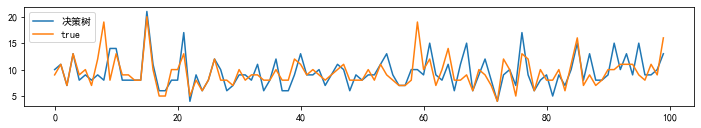

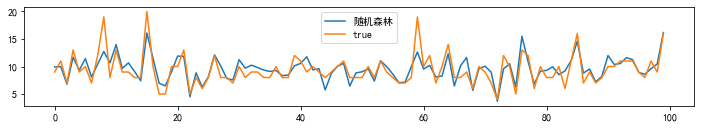

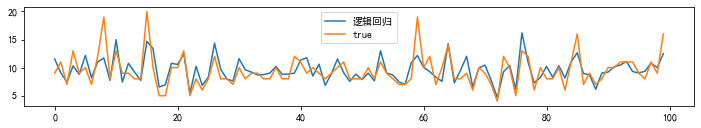

In [41]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# 可视化预测曲线
plt.figure(figsize=(12, 4)) # 图像尺寸
plt.title('Abalone age prediction') # 标题
n = 100 # 图中显示样本的数量
plt.subplot(211)
plt.plot(np.arange(n), y_pred1[:n], label='决策树') # 预测值
plt.plot(np.arange(n), y_test[:n], label='true') # 实际值
plt.legend() # 显示图例
plt.show()

plt.figure(figsize=(12, 4)) # 图像尺寸
plt.subplot(212)
plt.plot(np.arange(n), y_pred2[:n], label='随机森林') # 预测值
plt.plot(np.arange(n), y_test[:n], label='true') # 实际值
plt.legend() # 显示图例
plt.show()



### 4 使用graphviz进行决策树的可视化

In [ ]:
# 查看决策树图像
# 在本地环境中安装graphviz，pip install graphviz
# 需要在graphviz官网下载graphviz软件并安装，安装完成后配置此电脑环境变量即可查看决策树生成的pdf
dot_data = export_graphviz(model_1)
graph = graphviz.Source(dot_data)
# 生成 Source.gv.pdf 文件，并打开
graph.view()